# Exploratory Activity 2: Working with N/O<sub>x</sub> Observations

Today we will explore measurements of nitrogen oxides collected during a large-scale aircraft campaign that took place over South Korea and the surrounding areas from April to June 2016. The project was named “KORUS-AQ” to commemorate the collaborative effort of Korean and United States institutions to characterize a number of different air quality-relevant atmospheric species around Korea.

The National Aeronautics and Space Administration (NASA) maintains the datasets for the KORUS-AQ campaign in a standardized format called "ICARTT," which stands "International Consortium for Atmospheric Research on Transport and Transformation." The python3 programming language does not know how to interpret ICARTT files by default, so we have provided a function that handles these files for you. This is a function you can return to if you encounter ICARTT files again in the future.

Run the code below to define the function within this jupyter notebook.

In [128]:
# first install the necessary libraries
from urllib.request import urlopen 
import pandas as pd

In [235]:
def get_data_frame(_url):
    header_line = None
    header=None
    data=[]

    # download the data from the internet
    req = urlopen(_url)

    # loop over each of the lines in the file
    for i, line in enumerate(req):
        
        # for each line treat it as utf-8, remove line breaks and return characters. 
        # then turn it into a list by splitting on commas
        l=line.decode('utf-8').replace('\n', '').replace('\r', '').split(",")
        
        # the first line indicates how many lines until the data header 
        if not header_line:
                header_line = int(l[0])-1
        
        # when we reach the 'header_line' (the line that indicates what the columns contain), store it as 'header'
        if i == header_line:
               header = [s.strip() for s in l]
        
        # otherwise - if we're past the header, store the data as a float value
        elif i>header_line:
            try:
              data.append([float(n) for n in l])
            except:
              print(l)
           
    return pd.DataFrame(data, columns = header)

## **2.1 Removing Outliers and Other Non-Physical Values**

During KORUS-AQ, NO<sub>2</sub> was measured by multiple research teams via multiple instrumentation techniques simultaneously, producing independent datasets that can be used to validate and corroborate one another. Use the code provided below to load the measurements record by three separate instruments on 10 May 2016. Since you are downloading the data directly from the NASA website, this may take a few minutes.


In [285]:
"""
From the website
https://www-air.larc.nasa.gov/cgi-bin/ArcView/korusaq
Download the following ICartt files
Note: these urls were collected by right clicking the web links and copying them

"""
# KORUSAQ-NOxyO3_DC8_20160510_R1.ict
CHEMI_url = 'https://www-air.larc.nasa.gov/cgi-bin/enzFile?c1684C5749C53F525A470B4E964F4D05ABA2f7075622d6169722f4b4f52555341512f4443385f41495243524146542f5745494e4845494d45522e414e445245572f4b4f52555341512d4e4f78794f335f4443385f32303136303531305f52312e696374'

# korusaq-TDLIF-NO2_DC8_20160510_R1.ict	
TDLIF_url ='https://www-air.larc.nasa.gov/cgi-bin/enzFile?c1684C5749C53F525A470B4E964F4D05ABA2f7075622d6169722f4b4f52555341512f4443385f41495243524146542f434f48454e2e524f4e414c442f6b6f72757361712d54444c49462d4e4f325f4443385f32303136303531305f52312e696374'
      
# KORUSAQ-K-ACES_DC8_20160510_R1.ict
KACES_url = 'https://www-air.larc.nasa.gov/cgi-bin/enzFile?c1684C5749C53F525A470B4E964F4D05ABA2f7075622d6169722f4b4f52555341512f4443385f41495243524146542f4d494e2e4b59554e472d45554e2f4b4f52555341512d4b2d414345535f4443385f32303136303531305f52312e696374'

#load all the files and store for future use
CHEMI_df=get_data_frame(CHEMI_url)
TDLIF_df=get_data_frame(TDLIF_url)
KACES_df= get_data_frame(KACES_url)



Use the code below to view the first five rows of the CHEMI_df, TDLIF_df, and KACES_df dataframes.

In [237]:
CHEMI_df[0:5]

,StartTime_UTsec,StopTime_UTsec,MidTime_UTsec,NO_pptv,NOy_pptv,NO2_pptv,O3_ppbv
0,82799.5,82800.5,82800.0,-999999.9,-999999.9,-999999.9,-999999.9
1,82800.5,82801.5,82801.0,-999999.9,-999999.9,-999999.9,-999999.9
2,82801.5,82802.5,82802.0,-999999.9,-999999.9,-999999.9,-999999.9
3,82802.5,82803.5,82803.0,-999999.9,-999999.9,-999999.9,-999999.9
4,82803.5,82804.5,82804.0,-999999.9,-999999.9,-999999.9,-999999.9


In [238]:
TDLIF_df[0:5]

,seconds,NO2_LIF,PNs_LIF,ANs_LIF
0,82661.0,24801.0,408.0,431.0
1,82662.0,24642.0,446.0,446.0
2,82663.0,24291.0,469.0,310.0
3,82664.0,23967.0,477.0,261.0
4,82665.0,23659.0,636.0,355.0


In [239]:
KACES_df[0:5]

,Start_time,Stop_time,Mid_time,NO2_KACES,CHOCHO_KACES,Flag_KACES
0,79795.6,79805.6,79800.6,-9999.0,-9999.0,-9999.0
1,79805.6,79815.6,79810.6,-9999.0,-9999.0,-9999.0
2,79815.6,79825.6,79820.6,-9999.0,-9999.0,-9999.0
3,79825.6,79835.6,79830.6,-9999.0,-9999.0,-9999.0
4,79835.6,79845.6,79840.6,-9999.0,-9999.0,-9999.0


**Question 2.1.1** Based on the variable names provided in the header of the dataframes, what is the name of the column that corresponds to the NO<sub>2</sub> measurement in each dataframe? What is the name of the column that corresponds to the timestamp information? Do these columns have the same names in each dataframe?

**Question 2.1.2** Visualize these three datasets by plotting their time series on the same graph.

*Hint: If you don't remember how to plot a time series, consult Exploratory Activity 1.* 

In [286]:
# first install the necessary graphing library
import matplotlib.pyplot as plt

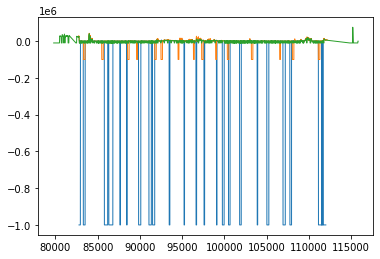

In [287]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
NO2_pptv = CHEMI_df['NO2_pptv']
NO2_LIF = TDLIF_df['NO2_LIF']
NO2_KACES = KACES_df['NO2_KACES']
time_CHEMI = CHEMI_df['MidTime_UTsec']
time_TDLIF = TDLIF_df['seconds']
time_KACES = KACES_df['Mid_time']
ax.plot(time_CHEMI, NO2_pptv, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')
ax.plot(time_TDLIF, NO2_LIF, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')
ax.plot(time_KACES, NO2_KACES, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')

**Question 2.1.3** What do you notice? Are there any data points that seem “non-physical,” or are unlikely to correspond to actual NO<sub>2</sub> concentrations in the atmosphere?


Some of these "non-physical" or "flat line" data points are known as "fill values," which are used as place holders when an observation is missing or has been discarded for some reason. For example, the "CHEMI" dataset uses the number -999999.90 as its a fill value. For visualization purposes, fill values are often replaced with NaNs, which stands for "not a number."

**Question 2.1.4** Replace the fill values in the three NO<sub>2</sub> datasets with NaNs and check your work by re-plotting the same time series from above. The CHEMI fill values have already been replaced as an example; it may take some trial and error to determine the numbers used as fill values in the other two datasets.

In [288]:
# first install the necessary data manipulation library
import numpy as np

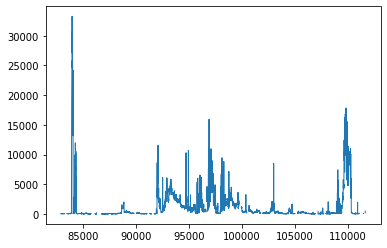

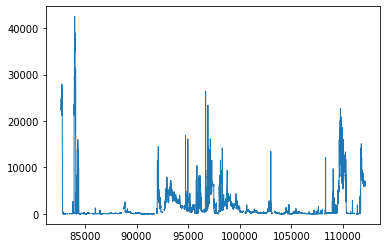

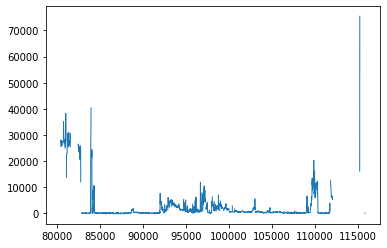

In [289]:
CHEMI_df = CHEMI_df.replace({'NO2_pptv':{-999999.90:np.NaN}})
TDLIF_df = TDLIF_df.replace({'NO2_LIF':{-99999.0:np.NaN}})
KACES_df = KACES_df.replace({'NO2_KACES':{-9999.0:np.NaN}})
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
NO2_pptv = CHEMI_df['NO2_pptv']
NO2_LIF = TDLIF_df['NO2_LIF']
NO2_KACES = KACES_df['NO2_KACES']
time_CHEMI = CHEMI_df['MidTime_UTsec']
time_TDLIF = TDLIF_df['seconds']
time_KACES = KACES_df['Mid_time']
ax.plot(time_CHEMI, NO2_pptv, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(time_TDLIF, NO2_LIF, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(time_KACES, NO2_KACES, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')

**Question 2.1.5** Other than the fill values, are there any other suspect data points that you want to remove from your “cleaned” dataset(s)? If so, devise your own strategy for identifying and removing these “outliers.” Check your work by plotting the new time series. 


In [290]:
NO2_KACES.loc[NO2_KACES >= 40000] = np.NaN

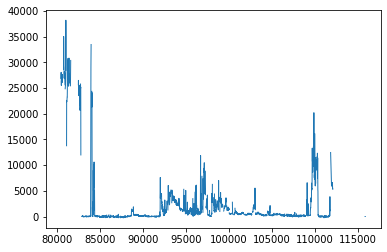

In [291]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
time_KACES = KACES_df['Mid_time']
ax.plot(time_KACES, NO2_KACES, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')

## **2.2 Interpolation**

**Question 2.2.1** You have likely already observed that these three datasets agree remarkably well. Now that the fill values and outliers have been removed, we can examine their agreement more precisely. Plot the KACES NO<sub>2</sub> measurements as a function of the TDLIF NO<sub>2</sub> measurements to analyze their correlation.

*Hint: If you don't remember how to make a correlation plot, consult Exploratory Activity 1. If you get an error, keep reading*


ValueError: x and y must be the same size

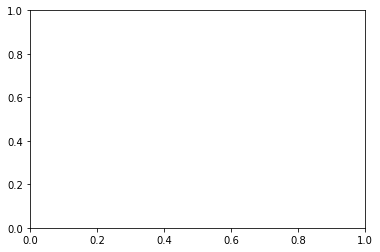

In [246]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.scatter(NO2_KACES, NO2_LIF)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

It is likely that you encountered an error when you attempted to create the plot requested above. That is because a correlation can only be plotted for two datasets whose data points perfectly coincide with one another, in this case, in time. The NO<sub>2</sub> mixing ratios in each dataset are associated with slightly different timestamps and so need to be re-processed before their correlation can be plotted.

For this purpose, it is helpful to know which measurements were collected the most frequently. Use the code below to ascertain the number of measurements in the KACES and TDLIF lists.

In [247]:
# get the number of rows in KACES_df
KACES_df.shape[0]

3248

In [248]:
# get the number of rows in TDLIF_df
TDLIF_df.shape[0]

29499

From this information, you can see that the KACES dataset contains fewer measurements than the TDLIF dataset, implying that the KACES measurements were collected less frequently than the TDLIF measurements. In order to examine the correlation with the TDLIF dataset, use to code below to interpolate the KACES dataset to the proper frequency by predicting what the KACES instrument would have measured during the TDLIF timestamps. Read through the code and comments below carefully to make sure you understand what each line does; you can refer back to this example whenever you need interpolation in the future.

In [249]:
from scipy import interpolate

# create a function that describes the original relationship between the KACES timestamp and NO2 data
f_KACES = interpolate.interp1d(KACES_df['Mid_time'],KACES_df['NO2_KACES'],bounds_error=False)

# use the function to predict what the KACES instrument would have measured during the TDLIF timestamps
NO2_KACES_interp = f_KACES(TDLIF_df['seconds'])

**Question 2.2.2** Now that you have coincident data, plot the correlations between these datasets. Because you'll be creating many more scatter plots over the course of this activity, define your own function that accepts two datasets as inputs and generates a scatter plot of their correlation that is formatted to your liking.

In [250]:
# import modules 'lines' as 'mlines' and 'transforms' as 'mtransforms' from the matplotlib library for use in creating the 1 to 1 line
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [251]:
def create_scatter_plot(x,y):
    fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
    ax.scatter(x, y)
    line = mlines.Line2D([0, 1], [0, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)

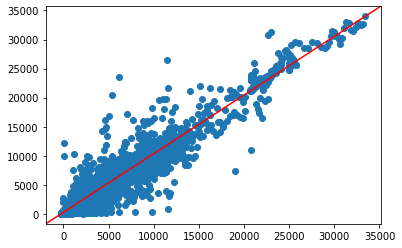

In [252]:
create_scatter_plot(NO2_KACES_interp,NO2_LIF)

**Question 2.2.3** Practice this for yourself by instead interpolating the TDLIF dataset onto the KACES frequency and plotting the resulting correlation.

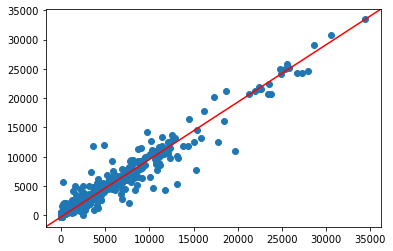

In [253]:
f_TDLIF = interpolate.interp1d(TDLIF_df['seconds'],TDLIF_df['NO2_LIF'],bounds_error=False)
NO2_TDLIF_interp = f_TDLIF(KACES_df['Mid_time'])
create_scatter_plot(NO2_TDLIF_interp,NO2_KACES)

**Question 2.2.4** An alternative to interpolating one dataset onto another’s timestamps is averaging both datasets onto a new, shared frequency. It is best if the new frequency is lower than the approximate frequency of the original datasets. Determine the approximate frquency of the original KACES and TDLIF datasets; are the measurements taken every second, every hour, etc.?

Code calculating the frequency of the KACES dataset has been provided for you.

In [254]:
# calculate the seconds between the first two rows
KACES_df_freq=KACES_df.iloc[1]["Mid_time"]-KACES_df.iloc[0]["Mid_time"]
print("KACES frequency:",KACES_df_freq,"seconds.")

TDLIF_df_freq=TDLIF_df.iloc[1]['seconds']-TDLIF_df.iloc[0]["seconds"]
print("TDLIF frequency:",KACES_df_freq,"seconds.")

KACES frequency: 10.0 seconds.
TDLIF frequency: 10.0 seconds.


**Question 2.2.5** Choose a frequency lower than both of those you calculated above to be the new, shared frequency and average both the KACES and TDLIF NO<sub>2</sub> observations to this frequency. Code adding a date column to each dataframe has been provided for you; you should read through the this code carefully and refer back to it whenever you need a date column for averaging in the future.

*Hint: If you don't remember how to average data onto new timescales, consult Exploratory Activity 1. It may also be helpful to reference the documentation for the panda "[Grouper](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html)" function*

In [255]:
# import the datetime library
import datetime

# add a datetime column to each dataframe
TDLIF_df['datetime']=None
KACES_df['datetime']=None

# define a date variable for use in assigning a date
start_date=datetime.datetime.strptime('20160510', '%Y%m%d')

# and calculate the new 'datetime' column from the 'Mid_time_UTsec' column -
# taking the 'Mid_time_UTsec' column and adding it to the base date
for i, row in TDLIF_df.iterrows():
    TDLIF_df.at[i, "datetime"]=start_date+datetime.timedelta(0,row['seconds'])
for i, row in KACES_df.iterrows():
    KACES_df.at[i, "datetime"]=start_date+datetime.timedelta(0,row['Mid_time'])

# set the new datetime columns to be the index of each dataframe
TDLIF_df.set_index('datetime', inplace=True, drop=True)
KACES_df.set_index('datetime', inplace=True, drop=True)

In [256]:
TDLIF_grouped = TDLIF_df.groupby(pd.Grouper(freq='20s'))
KACES_grouped = KACES_df.groupby(pd.Grouper(freq='20s'))

You're not quite ready to plot the correlation yet because, while they have been averaged to the same frequency, the two dataframes most likely still contain different numbers of observations. Use the code below to "clip" off the extra KACES data at the beginning and end of the data record.

In [257]:
# find the value of the first and last entries in the "datetime" index column of the TDLIF dataframe
import pandas as pd
first_TDLIF_timestamp = TDLIF_grouped[0:].index[0]
last_TDLIF_timestamp = TDLIF_grouped[-1:].index[0]

# trim off any "datetimes" from the KACES dataframe occuring before the first or after the last TDLIF "datetime"
KACES_grouped_short = KACES_grouped.truncate(before=first_TDLIF_timestamp,after=last_TDLIF_timestamp)

TypeError: unhashable type: 'slice'

**Question 2.2.6** Check your work by plotting the correlation of the two new, averaged NO<sub>2</sub> datasets.

In [258]:
## ENTER CODE HERE TO CALL YOUR 'create_scatter_plot' FUNCTION WITH THE APPROPRIATE INPUTS

There exists an alternate method for unifying disparate datasets built into the pandas dataframe architecture called "merge." Read through the comments and documentation shown below to make sure you understand how this function works.

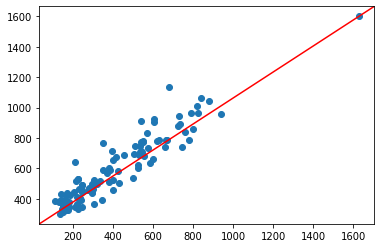

In [259]:
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html for more information
# the "how='outer'" parameter allows no data loss by creating rows in the joined table where there is no matching index
NO2_df_merge = pd.merge(KACES_df, TDLIF_df, left_on='datetime', right_on='datetime', how='outer')

# once the datasets are "merged," you can plot their correlation directly
create_scatter_plot(NO2_df_merge['NO2_LIF'],NO2_df_merge['NO2_KACES'])

Take a moment to review each of the three correlation strategies above: interpolation, averaging, and merging. Each has its own strengths and weakness. Merging has the benefit that the observations now reside in a single dataframe, and functions can then be easily performed on both datasets simultaneously.

As an example, the code below removes rows from the dataframe associated with timestamps containing a NaN value for either the KACES or TDLIF NO<sub>2</sub> observation.

In [260]:
# drop rows containing NaN values in the NO2_KACES column
NO2_df_merge=NO2_df_merge.dropna(subset=['NO2_KACES'])

# drop rows containing NaN values in the NO2_LIF column
NO2_df_merge=NO2_df_merge.dropna(subset=['NO2_LIF'])


**Question 2.2.7** Use the NaN-free merged dataframe to calculate the R<sup>2</sup> value associated with this correlation.

*Hint: If you don't remember how to calculate correlation coefficients, consult Exploratory Activity 1.*

In [261]:
# import the r2_score module for use in calculating the "coefficient of determination" or 'r squared'
from sklearn.metrics import r2_score

print(r2_score(NO2_df_merge['NO2_KACES'],NO2_df_merge['NO2_LIF'],  multioutput='variance_weighted'))

0.1849395715691312


**Question 2.2.8** Now calculate the R<sup>2</sup> value associated with the correlation between interpolated and averaged datasets. Note that you will need to remove the NaN values in those datasets as well; consult the code provided earlier in this exercise for guidance on merging the interpolated and averaged datasets before dropping the NaN values.

In [262]:
TDLIF_merge = pd.merge(NO2_TDLIF_interp, NO2_KACES_interp, left_on='datetime', right_on='datetime', how='outer')

# once the datasets are "merged," you can plot their correlation directly



TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

## **2.3 Practicing with Ozone Data**

We have been ignoring the CHEMI_df dataset for quite some time! Display the first five lines of this dataframe to remind yourself what it contains.

In [263]:
# show the first five lines of the CHEMI_df dataframe
CHEMI_df[0:5]

,StartTime_UTsec,StopTime_UTsec,MidTime_UTsec,NO_pptv,NOy_pptv,NO2_pptv,O3_ppbv
0,82799.5,82800.5,82800.0,-999999.9,-999999.9,NaN,-999999.9
1,82800.5,82801.5,82801.0,-999999.9,-999999.9,NaN,-999999.9
2,82801.5,82802.5,82802.0,-999999.9,-999999.9,NaN,-999999.9
3,82802.5,82803.5,82803.0,-999999.9,-999999.9,NaN,-999999.9
4,82803.5,82804.5,82804.0,-999999.9,-999999.9,NaN,-999999.9


As you can see, the "CHEMI" instrument is unique from the other two in that it also collected measurements O<sub>3</sub>.

**Question 2.3.1** Plot the time series of the O<sub>3</sub> mixing ratios.

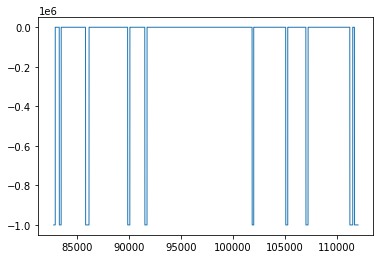

In [264]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
O3_ppbv = CHEMI_df['O3_ppbv']
time_CHEMI = CHEMI_df['MidTime_UTsec']
ax.plot(time_CHEMI, O3_ppbv, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')

**Question 2.3.2** “Clean” the O<sub>3</sub> data by removing the non-physical “fill values” like you did before for NO<sub>2</sub>. If there are any additional “outliers,” be sure to remove those as well. Check your work by plotting the new time series.


In [265]:
CHEMI_df = CHEMI_df.replace({'O3_ppbv':{-999999.90:np.NaN}})

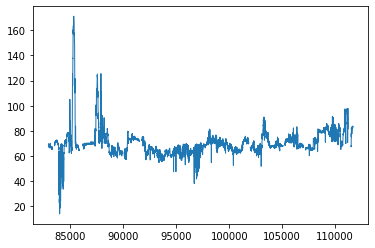

In [266]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
O3_ppbv = CHEMI_df['O3_ppbv']
time_CHEMI = CHEMI_df['MidTime_UTsec']
ax.plot(time_CHEMI, O3_ppbv, linewidth=1, label='KORUSAQ-NOxyO3_DC8_20160510_R1.ict')

**Question 2.3.3** Create a scatter plot to examine the correlation between the CHEMI NO<sub>2</sub> and O<sub>3</sub> measurements.


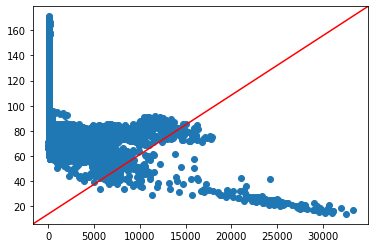

In [267]:
create_scatter_plot(CHEMI_df['NO2_pptv'],O3_ppbv)

As you may have noticed, NO<sub>2</sub> and O<sub>3</sub> don't seem to have a direct 1:1 correlation. To learn more about the nature of their relationship, you can use a linear regression function. The code below demonstrates how to find and plot the line of best fit through these data points. Read through the code and the comments to make sure you understand what each step is doing.

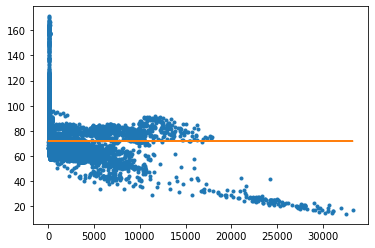

In [268]:
# polyfit requires that NaN rows be removed
CHEMI_df=CHEMI_df.dropna(subset=['O3_ppbv'])
CHEMI_df=CHEMI_df.dropna(subset=['NO2_pptv'])

# find the line of best fit through the data with polyfit; b gives the y-intercept and m gives the slope
m, b = np.polyfit(CHEMI_df['NO2_pptv'], CHEMI_df['O3_ppbv'], 1)

# plot the original data points as well as the line of best fit
plt.plot(CHEMI_df['NO2_pptv'], CHEMI_df['O3_ppbv'],".")
plt.plot(CHEMI_df['NO2_pptv'], b + m * CHEMI_df['O3_ppbv'], '-')
plt.show()

**Question 2.3.4** Note that the linear regression seems to fit some of the data points alright, while other data points do not fit this linear relationship. This is because there are two distinct O<sub>3</sub>-NO<sub>2</sub> relationships represented in these datasets depending on whether the NO<sub>2</sub> mixing ratio is very low (0-150 ppt) or higher (>150 ppt). Linear regression functions tend to prioritize fitting data points with higher magnitudes, and so fail to capture relationships present at lower concentrations. In order to examine the low-NO<sub>2</sub> relationship directly, devise your own strategy to plot and fit only this subset of the data points.


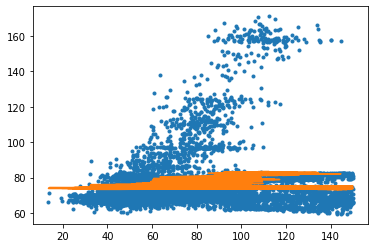

In [269]:
CHEMI_df_subtract = CHEMI_df
CHEMI_df_subtract['NO2_pptv'].loc[CHEMI_df_subtract['NO2_pptv'] >= 150] = np.NaN
CHEMI_df_subtract=CHEMI_df.dropna(subset=['O3_ppbv'])
CHEMI_df_subtract=CHEMI_df.dropna(subset=['NO2_pptv'])
m, b = np.polyfit(CHEMI_df_subtract['NO2_pptv'], CHEMI_df_subtract['O3_ppbv'], 1)

# plot the original data points as well as the line of best fit
plt.plot(CHEMI_df_subtract['NO2_pptv'], CHEMI_df_subtract['O3_ppbv'],".")
plt.plot(CHEMI_df_subtract['NO2_pptv'], b + m * CHEMI_df_subtract['O3_ppbv'], '-')
plt.show()

**Question 2.3.5** Plot and fit the subset of data points with NO<sub>2</sub> > 150 ppt.

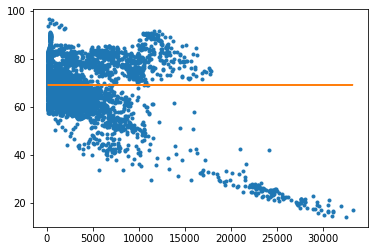

In [278]:
CHEMI_df_subtract = CHEMI_df
CHEMI_df_subtract['NO2_pptv'].loc[CHEMI_df_subtract['NO2_pptv'] <= 150] = np.NaN
CHEMI_df_subtract=CHEMI_df.dropna(subset=['O3_ppbv'])
CHEMI_df_subtract=CHEMI_df.dropna(subset=['NO2_pptv'])
m, b = np.polyfit(CHEMI_df_subtract['NO2_pptv'], CHEMI_df_subtract['O3_ppbv'], 1)

# plot the original data points as well as the line of best fit
plt.plot(CHEMI_df_subtract['NO2_pptv'], CHEMI_df_subtract['O3_ppbv'],".")
plt.plot(CHEMI_df_subtract['NO2_pptv'], b + m * CHEMI_df_subtract['O3_ppbv'], '-')
plt.show()

**Question 2.3.6** Correlate the CHEMI ozone dataset with one of the other (i.e., KACES or TDLIF) NO<sub>2</sub> datasets. Note that you will need likey need to interpolate, average, or merge the observations first!

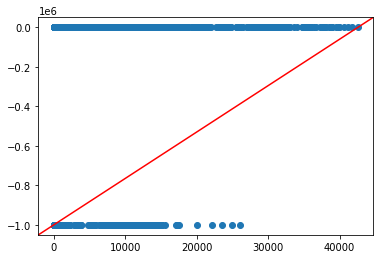

In [293]:
from scipy import interpolate

# create a function that describes the original relationship between the KACES timestamp and NO2 data
f_TDLIF = interpolate.interp1d(TDLIF_df['seconds'],TDLIF_df['NO2_LIF'],bounds_error=False)

# use the function to predict what the KACES instrument would have measured during the TDLIF timestamps
NO2_TDLIF_interp = f_TDLIF(CHEMI_df['MidTime_UTsec'])
create_scatter_plot(NO2_TDLIF_interp,CHEMI_df['O3_ppbv'])

**Discussion Questions.** Pair up with a partner and discuss the following:

1. Compare the NO<sub>2</sub> correlations that resulted from the interpolating vs. averaging vs. merging approaches. Which approach would you recommend and why? 
2. Compare your respective approaches for eliminating O<sub>3</sub> outliers.
    * What were the strengths and weaknesses of each? If you used the same approach as your partner, discuss another approach you could have used.
    * How many data points did each of your strategies end up removing from the dataset?
    * What would happen to your data analysis if your outlier definition was too aggressive (e.g., eliminated some valid data points)? What would happen to your data analysis if your outlier definition was too permissive (e.g., kept some invalid data points)?
3. Compare the best fit O<sub>3</sub> vs. NO<sub>2</sub> lines you derived for the entire vs. just the low-NO<sub>2</sub> population of the data points. Using what you learned this morning about the NO<sub>x</sub> cycle, what is the possible chemical explanation for the sign of the slope of these lines? In there an alternative, physical explanation?
4. What did you discover about the correlation between O<sub>3</sub> and either the KACES or TDLIF NO<sub>2</sub> observations? Were your conclusions the same as your partners? If not, discuss how your analyses differed.